In [1]:
from __future__ import division
import numpy as np
from materials import vac, Al, GB
from microscope import Microscope
from bulkMode import bulk_NR, bulk
from twoSlabParallel import twoSlabParallel, dispersion
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm

C:\Users\erhog\Documents\GitHub\Interface_Plasmon_Simulation\Interface_Plasmon_Simulation\materials.py:49: RuntimeWarning: invalid value encountered in double_scalars
  self.q_c = (m0*self.me)/(hbar* hbar*e) * self.E_p0/self.k_F


In [2]:
save_folder = 'C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/AlandGB_da1E-1_dE0.8/300keV/'

Initial varibales

In [3]:
c = 3E8 #[m/s]
hbar=6.582E-16#[eV s]

Set dimmensions

In [4]:
x = np.array([-40, 0, 40])*1E-10#np.arange(-5,0,0.5)*1E-10 #[m]
q_y = np.linspace(1E-2,1.5,2000,endpoint=True)*1E10 #np.linspace(1E-2, 200, 2000, endpoint=True)*1E6 #
E = np.arange(12,20,0.03)

x = x[:,np.newaxis,np.newaxis]
q_y = q_y[np.newaxis,:,np.newaxis]
E = E[np.newaxis,np.newaxis,:]

In [5]:
fileDim = 'E1E-3to20eV_q0to1.5A.jpg' #'E12to20eV_q0to1.5A_Mermin.jpg' #

Set materials

In [11]:
materials = [Al,GB()]#[Al,vac]#[GB(), Al]#
for material in materials:
    print(material.name)
    print('n: ',material.n,'[e-/m^3]')
    material.set_Ep(type='Drude')
    material.set_eps(E=E, q=q_y, type='Drude', multiple_eps=True)
#    material.set_eps(E=E, q=q_y, type='Lindhard', multiple_eps=True)
#    material.set_eps(E=E, q=q_y, type='Mermin', multiple_eps=True)
    print('Ep_0',material.E_p0)    
    print('Emax',np.sqrt(material.E_p0**2/(material.eps_inf) - material.dE**2))
    #material.set_eps(E=E,type='Drude')
    print('')

Al
n:  1.8117722802e+29 [e-/m^3]
Setting E_p
Setting eps
Ep_0 15.6127511844
Emax 15.3174786349

GB
n:  1.68381104041e+29 [e-/m^3]
Setting E_p
Setting eps
Ep_0 15.0513103085
Emax 14.7586910146



Set microscope

In [12]:
microscope = Microscope(keV=300)
microscope.print_parameters()

Microscope
  keV :  300
  gamma :  1.5870841487279843
  beta2 :  0.6029912379261115
  v :  232957531.351
  T :  154304.780267
  k0 :  3.19429261034e+12
  resolution :  0.05
  dispersion :  0.05
  collection_angle :  0.002



# Plotting

In [13]:
pos_index= 0

dielectric funciton

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(E[0,0,:],np.real(materials[0].eps[0,0,:]), '-k', label='Al real')
ax.plot(E[0,0,:],np.imag(materials[0].eps[0,0,:]), '--k', label='Al imag')
ax.plot(E[0,0,:],np.real(materials[1].eps[0,0,:]), '-r', label='GB real')
ax.plot(E[0,0,:],np.imag(materials[1].eps[0,0,:]), '--r', label='GB imag')
ax.set_xlabel('E [eV]')
ax.set_ylabel(r'$\epsilon(E)$')
ax.set_xlim(xmin=3)
plt.autoscale(enable=True, axis='x', tight=True)
ax.legend()
plt.show()

In [ ]:
#fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/eps.jpg',
#            transparent=True, bbox_inches='tight', dpi=800)

In [ ]:
epsSumReal = np.real(materials[0].eps[0,0,:])+np.real(materials[1].eps[0,0,:])
nearZero=(np.abs(epsSumReal)).argmin()
print(epsSumReal[nearZero-1:nearZero+2])
print(E[0,0,nearZero-1:nearZero+2])

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(E[0,0,:], np.imag(materials[0].eps[0,0,:])+np.imag(materials[1].eps[0,0,:]), label='imag')
ax.plot(E[0,0,:], np.real(materials[0].eps[0,0,:])+np.real(materials[1].eps[0,0,:]), label='real')
ax.plot([E[0,0,nearZero]],[epsSumReal[nearZero]],'ok')
ax.text(E[0,0,nearZero]+0.07,epsSumReal[nearZero],'({:0.3f}, {:0.3f})'.format(E[0,0,nearZero],epsSumReal[nearZero]))
ax.set_xlabel('E [eV]')
ax.set_ylabel(r'$\epsilon_{Al}+\epsilon_{vac}$')
ax.legend()
plt.show()

In [ ]:
#fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/epsSum.jpg',
#            transparent=True, bbox_inches='tight', dpi=800)

Bulk

In [14]:
bulk = bulk(microscope, material=materials,
                   x=x, q_y=q_y, E=E)#, eps='Mermin')

In [ ]:
fig, ax = plt.subplots(2, figsize=(20,10), sharex=True)
fig.suptitle(r'pos: {} [m]'.format(x[pos_index,0,0]))
img0 = ax[0].imshow(bulk[pos_index,:,:], aspect='auto', origin='lower', norm=LogNorm(), cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_y), np.amax(q_y)))
ax[0].set_title('Bulk')
ax[0].set_ylabel(r'$q_{y} [m^-]$')
fig.colorbar(mappable=img0, ax=ax[0])
ax[0].set_aspect('auto')

ax[1].plot(E[0,0,:],bulk[pos_index,:,:].sum(axis=0))
ax[1].set_xlim(xmin=0)
plt.autoscale(enable=True, axis='x', tight=True)
ax[1].set_xlabel('E [eV]')
#plt.tight_layout(pad=0.001)
plt.show()

In [ ]:
#fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/bulk.jpg',
#            transparent=True, bbox_inches='tight', dpi=800)

# SP

In [15]:
interface_1, interface_2, interface_3 = twoSlabParallel(microscope, material=materials,
                   x=x, q_y=q_y, E=E, NR=False)

In [ ]:
norm = LogNorm()
norm2 = SymLogNorm(1E-8)
norm3 = SymLogNorm(1E-12)
norm4 = LogNorm()#None

In [ ]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, figsize=(20,10), sharex=True)
img1 = ax1.imshow(interface_1[pos_index,:,:], aspect='auto', origin='lower', norm=norm, cmap=plt.get_cmap('hot'),
                 extent=(np.amin(E),np.amax(E), np.amin(q_y), np.amax(q_y)))
#ax1.set_xlabel('E [eV]')
ax1.set_ylabel(r'$q_{y} [m^-]$')
ax1.plot(q_y[0,:,0]*c*hbar, q_y[0,:,0], color='blue')
fig.colorbar(img1, ax=ax1)
ax1.set_xlim(np.amin(E),np.amax(E))

img2 = ax2.imshow(interface_2[pos_index,:,:], aspect='auto', origin='lower', norm=norm2, cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_y), np.amax(q_y)))
#ax2.set_xlabel('E [eV]')
ax2.set_ylabel(r'$q_{y} [m^-]$')
ax2.plot(q_y[0,:,0]*c*hbar, q_y[0,:,0], color='blue')
fig.colorbar(img2, ax=ax2)
ax2.set_xlim(np.amin(E),np.amax(E))

img3 = ax3.imshow(interface_3[pos_index,:,:], aspect='auto', origin='lower', norm=norm3, cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_y), np.amax(q_y)))
#ax3.set_xlabel('E [eV]')
ax3.set_ylabel(r'$q_{y} [m^-]$')
ax3.plot(q_y[0,:,0]*c*hbar, q_y[0,:,0], color='blue')
fig.colorbar(img3, ax=ax3)
ax3.set_xlim(np.amin(E),np.amax(E))

img4 = ax4.imshow(interface_1[pos_index,:,:]+interface_2[pos_index,:,:]+interface_3[pos_index,:,:]+bulk[pos_index,:,:], aspect='auto', origin='lower',
                  cmap=plt.get_cmap('hot'), norm=norm4,
             extent=(np.amin(E),np.amax(E), np.amin(q_y), np.amax(q_y)))
ax4.set_xlabel('E [eV]')
ax4.set_ylabel(r'$q_{y} [m^-]$')
fig.colorbar(img4, ax=ax4)
ax4.plot(q_y[0,:,0]*c*hbar, q_y[0,:,0], color='blue')
ax4.set_xlim(np.amin(E),np.amax(E))

plt.show()

In [ ]:
#fig.savefig(save_folder+fileDim, bbox_inches='tight', dpi=800)
#'E1E-3to20eV_q0to1.5A.jpg', bbox_inches='tight', dpi=800)
#

# figs to save

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,10))
img1 = plt.pcolor(E[pos_index,:,:], q_y[pos_index,:,:]/1E10,
                  interface_1[pos_index,:,:]+interface_2[pos_index,:,:]+interface_3[pos_index,:,:],
                  cmap=plt.get_cmap('hot'), norm=SymLogNorm(1E-5))
plt.setp(ax1.get_xticklabels(), fontsize=20)
plt.setp(ax1.get_yticklabels(), fontsize=20)
ax1.set_xlabel('E [eV]', fontsize=22)
ax1.set_ylabel(r'$q_{y}\ [\AA^-]$', fontsize=22)
fig.colorbar(img1, ax=ax1)
plt.show()

In [ ]:
#fig.savefig(save_folder+'interfaceOnly_'+fileDim, bbox_inches='tight', dpi=800)
#'interfaceOnly_E1E-3to20eV_q0to1.5A.jpg', bbox_inches='tight', dpi=800)
#

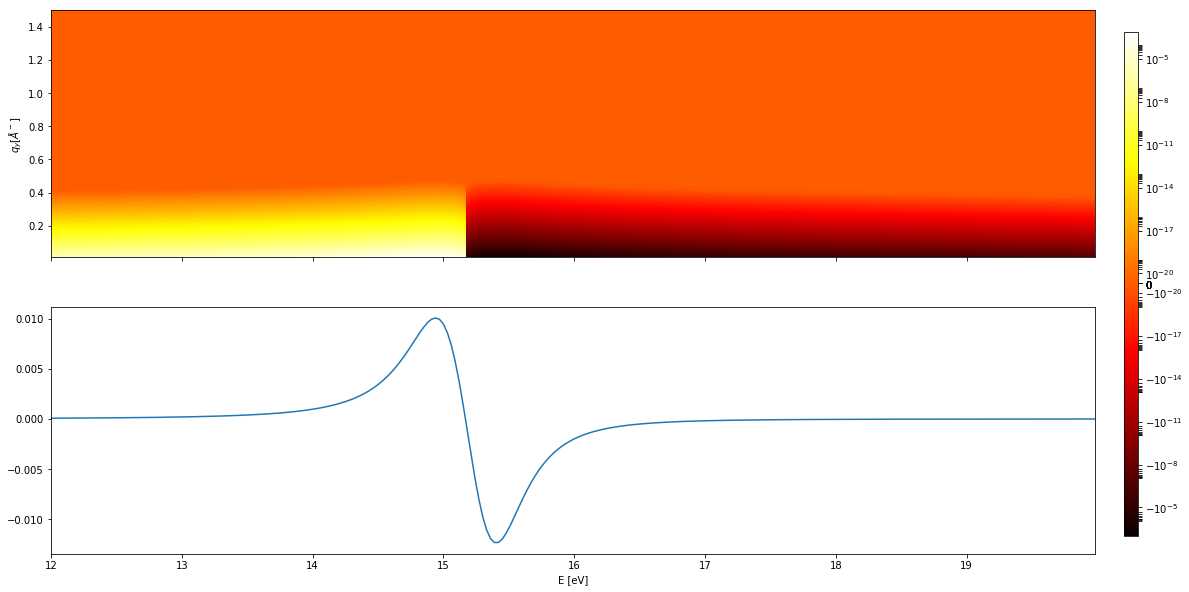

In [16]:
fig, ax = plt.subplots(2, figsize=(20,10), sharex=True)
#fig.suptitle(r'pos: {} [m]'.format(x[pos_index,0,0]))
img1 = ax[0].pcolor(E[pos_index,:,:], q_y[pos_index,:,:]/1E10,
                    interface_1[pos_index,:,:]+interface_2[pos_index,:,:]+interface_3[pos_index,:,:],
                  cmap=plt.get_cmap('hot'), norm=SymLogNorm(1E-20))
ax[0].set_ylabel(r'$q_{y} [\AA^-]$')
#fig.colorbar(mappable=img0, ax=ax[0])
ax[0].set_aspect('auto')

ax[1].plot(E[0,0,:],(interface_1[pos_index,:,:]+interface_2[pos_index,:,:]+interface_3[pos_index,:,:]).sum(axis=0))
ax[1].set_xlim(xmin=0)
plt.autoscale(enable=True, axis='x', tight=True)
ax[1].set_xlabel('E [eV]')
#plt.tight_layout(pad=0.001)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.01, 0.7])
fig.colorbar(mappable=img1, cax=cbar_ax)
plt.show()

In [17]:
fig.savefig(save_folder+'interfaceOnly_binned_Drude'+fileDim, bbox_inches='tight', dpi=800)